In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings


Import the necessary libraries (e.g., pandas, NumPy, matplotlib, seaborn).


In [177]:
data = pd.read_csv("breast_cancer_2.csv")

Load the dataset into a panda Data Frame.

In [178]:
data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,970.0,0.08474,twenty
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,NaN,1297.0,0.10030,0


Display the first 5 rows of the dataset to get a general idea of its structure.

In [179]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     1
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [180]:
#filling the null values with mean
data2 = data.fillna(value = data["mean_perimeter"].mean())

In [181]:
data2.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.800000,1001.0,0.11840,0
1,20.57,17.77,132.900000,970.0,0.08474,twenty
2,19.69,21.25,130.000000,1203.0,0.10960,0
3,11.42,20.38,77.580000,386.1,0.14250,0
4,20.29,14.34,91.893099,1297.0,0.10030,0


Check for missing values and handle them appropriately (e.g., impute missing values or drop 
rows/columns with missing values).

In [182]:
data2.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis           object
dtype: object

In [183]:
data2["numerica"] = data2["diagnosis"].str.isnumeric()

In [184]:
data2.head(2)
data2.shape

(569, 7)

In [185]:
data3 = data2[data2.numerica!=False]
data3.shape
data3.sort_index


<bound method DataFrame.sort_index of      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38      122.800000     1001.0          0.11840   
2          19.69         21.25      130.000000     1203.0          0.10960   
3          11.42         20.38       77.580000      386.1          0.14250   
4          20.29         14.34       91.893099     1297.0          0.10030   
5          12.45         15.70       82.570000      477.1          0.12780   
..           ...           ...             ...        ...              ...   
564        21.56         22.39      142.000000     1479.0          0.11100   
565        20.13         28.25      131.200000     1261.0          0.09780   
566        16.60         28.08      108.300000      858.1          0.08455   
567        20.60         29.33      140.100000     1265.0          0.11780   
568         7.76         24.54       47.920000      181.0          0.05263   

    diagnosis  numerica  

In [186]:
pd.value_counts(data2["numerica"])

True     568
False      1
Name: numerica, dtype: int64

In [187]:
data3.head(5)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,numerica
0,17.99,10.38,122.800000,1001.0,0.1184,0,True
2,19.69,21.25,130.000000,1203.0,0.1096,0,True
3,11.42,20.38,77.580000,386.1,0.1425,0,True
4,20.29,14.34,91.893099,1297.0,0.1003,0,True
5,12.45,15.70,82.570000,477.1,0.1278,0,True


In [188]:
data4 = data3.drop(["numerica"],axis=1)

In [189]:
data4.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.800000,1001.0,0.1184,0
2,19.69,21.25,130.000000,1203.0,0.1096,0
3,11.42,20.38,77.580000,386.1,0.1425,0
4,20.29,14.34,91.893099,1297.0,0.1003,0
5,12.45,15.70,82.570000,477.1,0.1278,0


In [190]:
data4["mean_area"] = data4["mean_area"].astype(int)
data4["diagnosis"] = data4["diagnosis"].astype(int)

In [191]:
data4.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area            int32
mean_smoothness    float64
diagnosis            int32
dtype: object

Handle any inconsistencies or errors in the dataset (e.g., typos, incorrect data types).

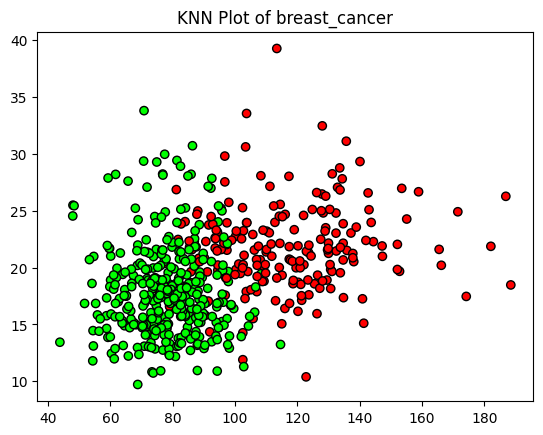

In [192]:
#visualising outliers
cmap = ListedColormap(['#FF0000','#00FF00'])
plt.figure()
plt.scatter(data4["mean_perimeter"],data4["mean_texture"], c=data4["diagnosis"], cmap=cmap, edgecolor='k')
plt.title("KNN Plot of breast_cancer")
plt.show()

Use descriptive statistics and visualization techniques to explore the dataset and identify any 
issues that need to be addressed (e.g., outliers, skewed distributions).

<Axes: >

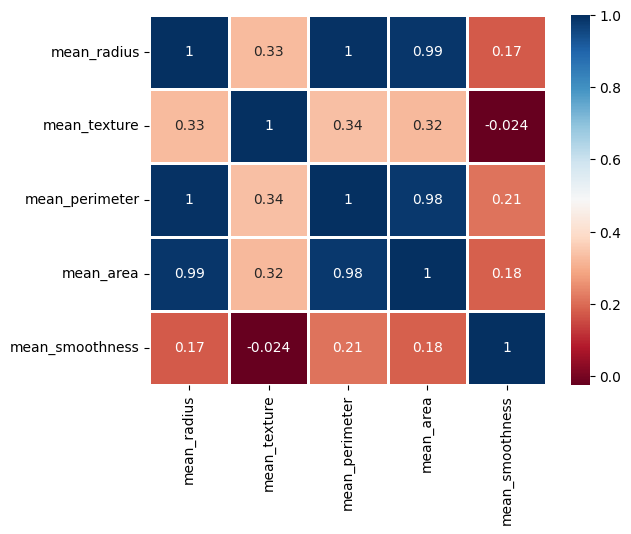

In [193]:
corr = data4.iloc[:,:-1].corr(method="pearson")
sns.heatmap(corr, annot=True, cmap='RdBu', linewidths=.9)

In [194]:
data5 = data4[["mean_area","mean_smoothness","mean_texture","diagnosis"]]

In [195]:
data5.head(3)

,mean_area,mean_smoothness,mean_texture,diagnosis
0,1001,0.1184,10.38,0
2,1203,0.1096,21.25,0
3,386,0.1425,20.38,0


Remove any irrelevant or redundant features (e.g., columns with constant values or high 
correlation with other columns).

In [196]:
def plots (df , var , t) :
    plt.figure(figsize=(13,5))
    sns.kdeplot(df[var])
    plt.title("before min max scalar "+var)
    plt.figure(figsize=(13,5))
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title("after min max scalar "+var)

In [197]:
mms = MinMaxScaler()
i = 0
for columns in data5.columns :
    i +=1
    plots(data5 , columns , mms)
    if (i==3) :
        break

In [ ]:
X = data5[["mean_area","mean_smoothness","mean_texture","diagnosis"]]
mms.fit_transform(X)

array([[0.36386768, 0.59375282, 0.0226581 , 0.        ],
       [0.4495335 , 0.51430893, 0.3902604 , 0.        ],
       [0.10305344, 0.81132075, 0.36083869, 0.        ],
       ...,
       [0.30322307, 0.28816467, 0.62123774, 0.        ],
       [0.47582697, 0.58833619, 0.66351031, 0.        ],
       [0.01611535, 0.        , 0.50152181, 1.        ]])

Scale or normalize any numerical variables as needed (e.g., standardization, min-max 
scaling).

In [ ]:
warnings.filterwarnings("ignore")
data5["surface"]  = data5["mean_smoothness"]*data5["mean_texture"]

In [ ]:
data5

,mean_area,mean_smoothness,mean_texture,diagnosis,surface
0,1001,0.11840,10.38,0,1.228992
2,1203,0.10960,21.25,0,2.329000
3,386,0.14250,20.38,0,2.904150
4,1297,0.10030,14.34,0,1.438302
5,477,0.12780,15.70,0,2.006460
...,...,...,...,...,...
564,1479,0.11100,22.39,0,2.485290
565,1261,0.09780,28.25,0,2.762850
566,858,0.08455,28.08,0,2.374164
567,1265,0.11780,29.33,0,3.455074


Create new features from existing features (e.g., combining features, extracting information 
from text data).
